# Lab 6: Graphs 2

Lab associated with Module 6: Graphs II

***

In [3]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\jarac\AppData\Local\Temp\ipykernel_9428\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [4]:
import numpy as np

In [5]:
import math

In [6]:
import time

In [7]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [8]:
#Same node class as previous graphs module
#Added a few extra components (attributes: estD)
#Out and in neighbors can now incorporate weights 
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [9]:
#Graph Class modified to incorporate weights
class Graph:
    
    def __init__(self):
        
        self.vertices = []
        self.edges = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
  #  def addEdgeArray(self, u, v, wt ):
   #     self.edges.append([u, v, wt])
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b[0]) + "," + str(b[1]) + ")\n\t "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

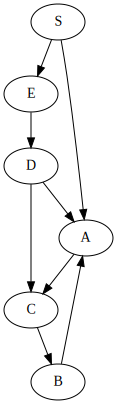

In [10]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [11]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [12]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

In [13]:
print(G)

Graph with:
	 Vertices:
	S,E,A,D,B,C,
	 Edges:
	(S,E,8)
	 (S,A,10)
	 (E,D,1)
	 (A,C,2)
	 (D,A,-4)
	 (D,C,-1)
	 (B,A,1)
	 (C,B,-2)
	 



Second Example

In [14]:
G2 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G2.addVertex( Node(i) )
    
V2 = G2.vertices

G2.addDiEdge( V2[0], V2[1], 3)

G2.addDiEdge( V2[0], V2[2] , 4)

G2.addDiEdge( V2[2], V2[1], -2)

In [15]:
print(G2)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,A,3)
	 (S,B,4)
	 (B,A,-2)
	 



***

### Section 2: Dijkstra Algorithm

In [16]:
#Finds the quantity of the vertices in Graph G (6)
len(G.vertices)

6

In [17]:
#Creates a variable V for the vertices of graph G
V = G.vertices 

In [18]:
for i in range(len(V)):
    print(i, V[i].value)

0 S
1 E
2 A
3 D
4 B
5 C


In [19]:
#Finds the quantity of the vertices in Graph G2(3)
len(G2.vertices)

3

In [20]:
#Creates a variable V2 for the vertices of graph G2
V2 = G2.vertices 

In [21]:
for i in range(len(V2)):
    print(i, V2[i].value)

0 S
1 A
2 B


In [22]:
#Algorithm to find the shortest path between a node to all other nodes 
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

# Dijkstra's Test Cases

In [23]:
#Makes a non negative weighed graph
G3 = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['C', 'A', 'M', 'I']:
    G3.addVertex( Node(i) )
    
V3 = G3.vertices

#('C', 'A')
G3.addDiEdge( V3[0], V3[1], 5)

#('C', 'M')
G3.addDiEdge( V3[0], V3[2] , 8)

#('A', 'M')
G3.addDiEdge( V3[1], V3[2], 3)

#('I', 'A')
G3.addDiEdge( V3[3], V3[1], 6)

#('I', 'C')
G3.addDiEdge( V3[3], V3[0], 4)

#('M', 'I')
G3.addDiEdge( V3[2], V3[3], 9)


In [24]:
#Prints Graph G3
print(G3)

Graph with:
	 Vertices:
	C,A,M,I,
	 Edges:
	(C,A,5)
	 (C,M,8)
	 (A,M,3)
	 (M,I,9)
	 (I,A,6)
	 (I,C,4)
	 



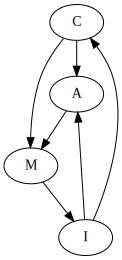

In [25]:
dot3 = Digraph()

dot3.edge('C', 'A')
dot3.edge('C', 'M')
dot3.edge('A', 'M')
dot3.edge('I', 'A')
dot3.edge('I', 'C')
dot3.edge('M', 'I')


dot3

In [26]:
#Runs Dijkstras alogorithm from C node 
w = G3.vertices[0]
dijkstra(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 0
A 5
M 8
I 17


In [27]:
#Runs Dijkstras alogorithm from A node 
w = G3.vertices[1]
dijkstra(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 16
A 0
M 3
I 12


In [28]:
#Runs Dijkstras alogorithm from M node 
w = G3.vertices[2]
dijkstra(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 13
A 15
M 0
I 9


In [29]:
#Runs Dijkstras alogorithm from I node 
w = G3.vertices[3]
dijkstra(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 4
A 6
M 9
I 0


In [30]:
#Runs Dijkstras alogorithm from S node 
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
E 8
A 5
D 9
B 5
C 7


In [31]:
#Runs Dijkstras alogorithm from E node 
w = G.vertices[1]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S inf
E 0
A -3
D 1
B -3
C -1


In [32]:
#Runs Dijkstras alogorithm from C node 
w = G.vertices[5]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S inf
E inf
A -1
D inf
B -2
C 0


In [33]:
#Runs Dijkstras alogorithm from A node 
w = G.vertices[2]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S inf
E inf
A 0
D inf
B 0
C 2


In [34]:
#Runs Dijkstras alogorithm from D node 
w = G.vertices[3]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S inf
E inf
A -4
D 0
B -4
C -2


In [35]:
#Runs Dijkstras alogorithm from B node 
w = G.vertices[4]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S inf
E inf
A 1
D inf
B 0
C 3


In [36]:
#Runs Dijkstras alogorithm from S node in Graph 2
w2 = G2.vertices[0]
dijkstra(w2, G2)

for v2 in G2.vertices:
    print(v2.value, v2.estD)

S 0
A 3
B 4


In [37]:
#Runs Dijkstras alogorithm from A node in Graph 2
w2 = G2.vertices[1]
dijkstra(w2, G2)

for v2 in G2.vertices:
    print(v2.value, v2.estD)

S inf
A 0
B inf


In [38]:
#Runs Dijkstras alogorithm from B node in Graph 2
w2 = G2.vertices[2]
dijkstra(w2, G2)

for v2 in G2.vertices:
    print(v2.value, v2.estD)

S inf
A -2
B 0


***

### <font color='red'> Activity 1: Code Reflections. </font>

In [382]:
### TODO ###
### Good Luck ###
'''
We are now utilising weighted directed graphs. Out and in neighbours have been tweaked slightly to allow for weights. The node class has a new attribute for estimated distance.
Dijkstra's algorithm allows us to find the shortest path between any two vertices of a graph. It starts from 1 specific vertex and cannot handle negative weights.
Both G and G2 have negative weights and as such their outputs from Dijkstra's should not be trusted.
I have created a graph G3 which is has only positive weights. The output from Dijkstra from all 4 vertices can be trusted as accurate.
Since the graphs are directed an output of inf means that the algorithm is unable to reach that node. This is due to its location and directed edges.
When running Dijkstra's the inputted node distance will always be 0, as this represents the shortest distance to itself. This is evident for every Dijkstra run and for the negative weighted graphs it is the only 
value that can be trusted.
This implementation of Dijkstra's has a sure and unsure vertices array. It goes through the unsure array one by one updating the minimum distances until there are no more.
Then it updates u's neighbours and removes the vertices from the unsure array to the sure. 
'''

"\nWe are now utilising weighted directed graphs. Out and in neighbours have been tweaked slightly to allow for weights. The node class has a new attribute for estimated distance.\nDijkstra's algorithm allows us to find the shortest path between any two vertices of a graph. It starts from 1 specific vertex and cannot handle negative weights.\nBoth G and G2 have negative weights and as such their outputs from Dijkstra's should not be trusted.\nI have created a graph G3 which is has only positive weights. The output from Dijkstra from all 4 vertices can be trusted as accurate.\nSince the graphs are directed an output of inf means that the algorithm is unable to reach that node. This is due to its location and directed edges.\nWhen running Dijkstra's the inputted node distance will always be 0, as this represents the shortest distance to itself. This is evident for every Dijkstra run and for the negative weighted graphs it is the only \nvalue that can be trusted.\nThis implementation of D

### <font color='red'> Activity 2: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [ ]:
'''
Dijkstra Bellman-Ford Comparison:
Both Dijkstra and Bellman-Ford are shortest path algorithms. Dijkstra is greedy in that it focuses on one node during exploration. Dijkstra is unable to accurately handle negative weights and if weights are
changed it must be rerun. It is faster than Bellman-Ford. Bellman-Ford selects all nodes one by one and has some flexibility with changing weights. Bellman selects each node in a graph repeatedly until no 
changes occur. In Dijkstra nodes are labeleed as sure or unsure whereas in Bellman-Ford this does not occur. 

'''

In [39]:
#### TODO ####
### Good Luck ###

'''
APPROACH 1
def bellman(w, G):
    numberVertices = len(G.vertices)
    #n-1 vertex
    lastvertex =G.vertices[numberVertices-1]
    
    #Begins by setting all the vertices of the graph to 0
    for v in G.vertices:
        v.estD = math.inf
    
    #Start node set to 0
    w.estD = 0
    doneVertices = []
    
    for i in range (numberVertices-1):
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                #Tests for negative Cycles
                if u.estD != math.inf and u.estD + wt< v.estD:
                    print("Negative Cycle")
                    return
                if u.estD == wt < v.estD:
                    v.estD = u.estD + wt
                    
        doneVertices.append(u)
        return
'''
    
def BellmanFord(w, G):
    for v in G.vertices:
        v.estD = math.inf
    w.estD = 0
    done = []
    exploring = G.vertices[:]
    
    for i in range(0, len(G.vertices)):
        for u in exploring:
            for v, wt in u.getOutNeighborsWithWeights():
                if u.estD != math.inf and u.estD + wt < v.estD:
                    v.estD = u.estD + wt
                #Tests for negative Cycles
                if u.estD != math.inf and u.estD + wt< v.estD:
                    print("Negative Cycle")
                    return
                if u.estD + wt < v.estD:
                    v.estD = u.estD + wt
    


In [40]:
w2 = G2.vertices[1]
BellmanFord(w2, G2)

for v2 in G2.vertices:
    print(v2.value, v2.estD)


S inf
A 0
B inf


In [41]:
w= G3.vertices[0]
BellmanFord(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 0
A 5
M 8
I 17


In [42]:
w2 = G2.vertices[2]
BellmanFord(w2, G2)

for v2 in G2.vertices:
    print(v2.value, v2.estD)

S inf
A -2
B 0


In [43]:
w= G.vertices[0]
BellmanFord(w,G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
E 8
A 5
D 9
B 5
C 7


In [44]:
w= G3.vertices[0]
BellmanFord(w, G3)

for v3 in G3.vertices:
    print(v3.value, v3.estD)

C 0
A 5
M 8
I 17


### <font color='red'> Activity 3: Have a look at the following Python's implementation of heap (priority Queues): HeapDict, and try to convert our Dijkstra's implementation to use this heap data structure instead. </font>

In [45]:
import heapq as heap
from collections import defaultdict
#from heapdict import heapdict
import heapdict as heap

In [46]:
### TODO ###
### Good Luck ###
#Algorithm to find the shortest path between a node to all other nodes 

'''
APPROACH 1
def dijkstraH(w, G):
    
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    visited = set ()
    
    parentsMap = {}
    pq = []
    
    vertexCosts = defaultdict(lambda: float ('inf'))
    heap.heappush(pq, (0, w))
    
    while pq:
        _, node = heap.heappop(pq)
        visited.add(G.vertices)
        
        for adjNode, weight in G[node].items():
            if adjNode in visited: continue
                
            newCost = vertexCosts[node] + weight
            if vertexCosts[adjNode] > newCost:
                parentsMap[adjNode] = node
                vertexCosts[adjNode] = newCost
                heap.heappush(pq, (newCost, adjNode))
                    
                    
            return parentsMap, vertexCosts
    

'''

def dijkstraH(w, G):
    #Returns dict of (vertex -> dist) pairs 
    dist = {}
    prev = {}
    
    #Probably unnecessary
  #  w.estD = 0
    
    #Makes w 0 
    dist[w]= 0
    
    q = heap.heapdict()
    
    for v in G.vertices:
        if v != w:
            dist[v] = math.inf
        q[v] = dist[v]
   
    while len(q):        
        u = q.popitem()[0]
        
        for v, wt in u.getOutNeighborsWithWeights():
            alt = dist[u] + wt 

            
            if alt < dist[v]:
                dist[v] = alt
                q[v] = alt
                
    return dist 


In [47]:
w= G3.vertices[1]

dist = dijkstraH(w, G3)

for k,v in dist.items():
    print(k,v)

A 0
C 16
M 3
I 12


In [48]:
w= G3.vertices[0]

dist = dijkstraH(w, G3)

for k,v in dist.items():
    print(k,v)

C 0
A 5
M 8
I 17


In [49]:
w= G3.vertices[2]
dist = dijkstraH(w, G3)

for k,v in dist.items():
    print(k,v)

M 0
C 13
A 15
I 9


In [50]:
w= G3.vertices[3]
dist = dijkstraH(w, G3)

for k,v in dist.items():
    print(k,v)

I 0
C 4
A 6
M 9


***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

In [51]:
#A recursive strategy is not the best option here since the time complexity of n will grow as fast as the numbers themselves. Growth is exponential. We are repeating one calculation over and over again.
#T(n) = T(n-1) + T(n-2) + O(1)
#T(n)≥ T(n-1) + T(n-2) for n≥ 2
#Test case for a number as low as 28 started to slow substantially
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)               

In [52]:
Fibonacci(1)

1

In [53]:
Fibonacci(2)

2

In [54]:
Fibonacci(4)

5

In [55]:
Fibonacci(5)

8

In [56]:
Fibonacci(6)

13

In [57]:
Fibonacci(7)

21

In [58]:
Fibonacci(8)

34

In [59]:
Fibonacci(9)

55

In [60]:
Fibonacci(10)

89

In [61]:
Fibonacci(11)

144

In [62]:
#Begins to slow substantially after n = 28 
Fibonacci(30)

1346269

In [63]:
#Non recursive option uses lists instead. Much better runtime (goes from exponential to almost linear).
#Solves the sub problems F(0), F(1), then bigger problems F(2), ... then bigger problems F(n-1) up until F(n)
#A form of dynamic programming (Bottom up)
#No lag in test cases with n=25000
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
    return F[n]

In [64]:
fasterFibonacci(3)

3

In [65]:
fasterFibonacci(4)

5

In [66]:
fasterFibonacci(5)

8

In [67]:
fasterFibonacci(6)

13

In [68]:
fasterFibonacci(7)

21

In [69]:
fasterFibonacci(8)

34

In [70]:
fasterFibonacci(9)

55

In [71]:
fasterFibonacci(10)

89

In [72]:
fasterFibonacci(11)

144

In [73]:
fasterFibonacci(28)

514229

In [74]:
fasterFibonacci(85)

420196140727489673

In [75]:
fasterFibonacci(100)

573147844013817084101

In [76]:
fasterFibonacci(300)

359579325206583560961765665172189099052367214309267232255589801

In [77]:
fasterFibonacci(900)

88793027306605937532517516910637647045239090036365766884466525589158360259770006891772711976920559280382807770394537471560061517120086971996377683290300054868066659454250625417891167369401

In [78]:
fasterFibonacci(2000)

6835702259575806647045396549170580107055408029365524565407553367798082454408054014954534318953113802726603726769523447478238192192714526677939943338306101405105414819705664090901813637296453767095528104868264704914433529355579148731044685634135487735897954629842516947101494253575869699893400976539545740214819819151952085089538422954565146720383752121972115725761141759114990448978941370030912401573418221496592822626

In [79]:
fasterFibonacci(4000)

64574884490948173531376949015369595644413900640151342708407577598177210359034088914449477807287241743760741523783818897499227009742183152482019062763550798743704275106856470216307593623057388506776767202069670477506088895294300509291166023947866841763853953813982281703936665369922709095308006821399524780721049955829191407029943622087779296459174012610148659520381170452591141331949336080577141708645783606636081941915217355115810993973945783493983844592749672661361548061615756595818944317619922097369917676974058206341892088144549337974422952140132621568340701016273422727827762726153066303093052982051757444742428033107522419466219655780413101759505231617222578292486081002391218785189299675757766920269402348733644662725774717740924068828300186439425921761082545463164628807702653752619616157324434040342057336683279284098590801501

In [80]:
fasterFibonacci(10000)

5443837311356528133873426099375038013538918455469596702624771584120858286562234901708305154793896054117382267597802631738435958475111624143917470264295916992558633411790606304808979353147610846625907275936789915067796008830659796664196582493772180038144115884104248099798469648737533718002816376331778192794110136926275097950980071359671802381471066991264421477525447858767456896380800296226513311135992976272667944140010157580004351077746593580536250246170791805922641467900569075232189586814236784959388075642348375438634263963597073375626009896246266874611204173981940487506244370986865431562684718619562014612664223271181504036701882520531484587581719353352982783780035190252923951783668946766191795388471244102846393544948461445077876252952096188759727288922076853739647586954315917243453719361126374392633731300589616724805173798630636811500308839674958710261952463135244749950520419830518716832162328385979462724591977145462821839969578922379891219943177546970521613108109655995063829726125384

In [81]:
fasterFibonacci(25000)

3552293879432171509127295399108887507366095067071187974339990032643625408342138037892775025752467531144728691561082086130290437115246618296826111100982439172563715086274550534213022058697951171925502389533510870952207531424826066448316647967058822158527706988787316819649096356121969451807786487910042178820551538538043454597566200172355534244039262180857976029564853114163882291359060753354005408745204170782615327118525910739419985236764961829851709311700945589491835350352507623012581954312377931916744082078962656445976472533968480829007375638549624814219584324013506450788535487729657202480440862427294175363981253803991314202865190303052987111679331778975789360655034146695132475652682589973766794581383385372226263043326278097491542500573286659181886817470554608702210612705287731084795157170758279482037612857978976772148510949254228776434861586872339572512481485641557776354065676559167316272414604833085278808143917828870688188950284393383938343796557289538544079296039170226898476935785968

In [82]:
#A top down dynamic programming approach
#Uses memoization (keeping track of the stuff that has been done already)
#Also almost linear in runtime
def Fibonacci_topdown(n,F):
    
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)

    return F[n]

In [83]:
F = [0, 1, 1, 2, 3, 5, 8, 13, 21, 3, 4, 55, 89]

In [84]:
F2 = [1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170]

In [85]:
F3 = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

# List F Test Cases

In [86]:
print(len(F))

13


In [87]:
Fibonacci_topdown(1, F)

1

In [88]:
Fibonacci_topdown(2, F)

1

In [89]:
Fibonacci_topdown(3, F)

2

In [90]:
Fibonacci_topdown(4, F)

3

In [91]:
Fibonacci_topdown(5, F)

5

In [92]:
Fibonacci_topdown(6, F)

8

In [93]:
Fibonacci_topdown(7, F)

13

In [94]:
Fibonacci_topdown(0, F)

0

In [95]:
Fibonacci_topdown(9, F)

3

# List F2 Test Cases

In [96]:
print(len(F2))

15


In [97]:
Fibonacci_topdown(0, F2)

1346269

In [98]:
Fibonacci_topdown(1, F2)

2178309

In [99]:
Fibonacci_topdown(2, F2)

3524578

In [100]:
Fibonacci_topdown(3, F2)

5702887

In [101]:
Fibonacci_topdown(4, F2)

9227465

In [102]:
Fibonacci_topdown(5, F2)

14930352

In [103]:
Fibonacci_topdown(6, F2)

24157817

Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

### <font color='red'> Activity 4: Write a brief report comparing 'Dynamic Programming' with 'Divide-and-Conquer' strategy? (If you are not familiar with Divide-and-Conquer strategy - revisit Quick Sort or Binary Search algorithms. You should address why we can not use DP for Quick Sort or Binary Sort). </font>

In [ ]:
### TODO ###
### Good Luck ###
'''
Dynamic programming is a technique that helps to efficiently solve a class of problems that have overlapping subproblems and optimal substructure property.
Divide and conquer on the other hand involves breaking up a larger problem into non overlapping subproblems, solving the sub problems, and then combining the results (all the solutions are collected
to arrive at the final answers). Simply put the divide and conquer strategy recursively splits a problem into two or more subproblems that are similar or related in type, until the problems are simple enough 
to solve directly. 
The main difference between the two is the use of the subproblems. In dynamic programming the smaller problems are used to solve the big main problem. In divide and conquer the bigger problems are divided into 
smaller problems and solved seperately (Divide and conquer = solving a single problem, Dynamic programming = solving a series of problems).
While both strategies break down the main issue into seperate problems they do differ slightly. Divide and conquer is a form of recursive programming, whereas dynamic is non-recursive.
Divide and conquer is ordinarily more time consuming since each problem is dealt with seperately. Dynamic programming is more efficient. In dynamic programming the results of the sub problems are stored in a table
whereas in divide and conquer no results are stored when completing the sub problems. Dynamic programming sub problems are considered interdependent while divide and conquer sub problems are indepenedent.
When executing QuickSort and MergeSort there is a recursion that occurs. You never end up operating over the same elements of the array twice during any given level of recursion. This means that you are not 
using the subproblem to solve the bigger problem. As QuickSort and MergeSort do not have overlapping sub problems they do not fit the criteria for dynamic programming. 

'''

### <font color='red'> Activity 5: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

In [104]:
### TODO ###
### Good Luck ###
#Fibonacci is the base 
#def return step (n)  return n-1, n-2, n-3 

#Recursive
def returnStepR(n):
    if n == 0:
        return 1
    elif n<0:
        return 0
    else:
        return returnStepR(n-1) + returnStepR(n-2) + returnStepR(n-3) 

#Dynamic
def returnStepD(n):
    #creates an array of n+1 size and populates it with 0's
    array = [0] * (n + 1)
    #base cases 
    #Populates the first 3 spots of the array with 1, 1, 2
    array[0] = 1
    array[1] = 1
    array[2] = 2
     
    #loop from 3 to n 
    for i in range(3, n + 1):
        array[i] = array[i - 1] + array[i - 2] + array[i - 3]
    #Prints the final iteration of the array 
    print("Final Iteration From Index #"), print(i)
    print(array)
    #Returns the final value in the array which is the count of the number of ways to reach the nth step
    return array[n]




# Recursive Step Cases

In [105]:
returnStepR(4)

7

In [106]:
returnStepR(5)

13

In [107]:
returnStepR(6)

24

In [108]:
returnStepR(7)

44

In [109]:
returnStepR(8)

81

In [110]:
returnStepR(22)

410744

# Dynamic Step Cases

In [111]:
returnStepD(4)

Final Iteration From Index #
4
[1, 1, 2, 4, 7]


7

In [112]:
returnStepD(5)

Final Iteration From Index #
5
[1, 1, 2, 4, 7, 13]


13

In [113]:
returnStepD(6)

Final Iteration From Index #
6
[1, 1, 2, 4, 7, 13, 24]


24

In [114]:
returnStepR(6)

24

In [115]:
returnStepD(22)

Final Iteration From Index #
22
[1, 1, 2, 4, 7, 13, 24, 44, 81, 149, 274, 504, 927, 1705, 3136, 5768, 10609, 19513, 35890, 66012, 121415, 223317, 410744]


410744

In [116]:
returnStepD(100)

Final Iteration From Index #
100
[1, 1, 2, 4, 7, 13, 24, 44, 81, 149, 274, 504, 927, 1705, 3136, 5768, 10609, 19513, 35890, 66012, 121415, 223317, 410744, 755476, 1389537, 2555757, 4700770, 8646064, 15902591, 29249425, 53798080, 98950096, 181997601, 334745777, 615693474, 1132436852, 2082876103, 3831006429, 7046319384, 12960201916, 23837527729, 43844049029, 80641778674, 148323355432, 272809183135, 501774317241, 922906855808, 1697490356184, 3122171529233, 5742568741225, 10562230626642, 19426970897100, 35731770264967, 65720971788709, 120879712950776, 222332455004452, 408933139743937, 752145307699165, 1383410902447554, 2544489349890656, 4680045560037375, 8607945812375585, 15832480722303616, 29120472094716576, 53560898629395777, 98513851446415969, 181195222170528322, 333269972246340068, 612979045863284359, 1127444240280152749, 2073693258389777176, 3814116544533214284, 7015254043203144209, 12903063846126135669, 23732434433862494162, 43650752323191774040, 80286250603180403871, 147669437360234

180396380815100901214157639

### <font color='red'> Activity 6: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [119]:
#### TODO ####
### Good Luck ###


'''
APPROACH 1
def floydW(G):
    #variable for the number of vertices
    numberVertices = len(G.vertices)
    
    #create a 2D array and set all as infinity
    distance = np.full((numberVertices, numberVertices), math.inf)
    
  
    for u in range(numberVertices):
        for k in range (numberVertices):
            if u == k:
                distance[u][k]= 0
                
            for v in (G.vertices):
                distance[k][v] = min(distance[k][v], distance[k][u] + distance[u][v])
                                           
                
    print(distance)
'''

def Floyd(G):
        numberVertices = len(G.vertices)
        vertices = G.vertices
        #The ordered array to later populate the matrix
        orderedList = []
        
        for u in vertices:
            for v in vertices:
                if u == v:
                    orderedList.append(0)
                else:
                    flag = 0
                    for k, wt, in v.getOutNeighborsWithWeights():
                        if str(k) == str(u):
                            flag = 1
                            orderedList.append(wt)
                    if flag == 0:
                        orderedList.append(math.inf)
        print("Final Order", orderedList)
        x= 0
        table = np.zeros((numberVertices, numberVertices))
        
        #Populating the matrix with the ordered array values
        for i in range(numberVertices):
            for j in range(numberVertices):
                table[j][i] = orderedList[x]
                x+=1
                
        for k in range(1, numberVertices):
            for i in range(0, numberVertices):
                for j in range(0, numberVertices):
                    if table[i][j] > table[i][k] + table[k][j]:
                        table[i][j] = table[i][k] + table[k][j]
        #Prints the matrix table                 
        print(table)



In [120]:
Floyd(G3)

Final Order [0, inf, inf, 4, 5, 0, inf, 6, 8, 3, 0, inf, inf, inf, 9, 0]
[[ 0.  5.  8. 17.]
 [16.  0.  3. 12.]
 [13. 15.  0.  9.]
 [ 4.  6.  9.  0.]]


In [121]:
Floyd(G2)

Final Order [0, inf, inf, 3, 0, -2, 4, inf, 0]
[[ 0.  2.  4.]
 [inf  0. inf]
 [inf -2.  0.]]


In [122]:
Floyd(G)

Final Order [0, inf, inf, inf, inf, inf, 8, 0, inf, inf, inf, inf, 10, inf, 0, -4, 1, inf, inf, 1, inf, 0, inf, inf, inf, inf, inf, inf, 0, -2, inf, inf, 2, -1, inf, 0]
[[ 0.  8.  5.  9.  5.  7.]
 [inf  0. -3.  1. -3. -1.]
 [inf inf  0. inf  0.  2.]
 [inf inf -4.  0. -4. -2.]
 [inf inf  1. inf  0.  3.]
 [inf inf -1. inf -2.  0.]]


***

***